In [269]:
vehicle age,is esc, is_tpms, is adjustable steering, steering type, is parking camera, rare breaks type, turning radius, length and width, is fron fog lights,  rare window wiper, 



SyntaxError: invalid syntax (3887949755.py, line 1)

In [320]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [321]:
dataset_path = kagglehub.dataset_download("litvinenko630/insurance-claims")
df = pd.read_csv(f"{dataset_path}/Insurance claims data.csv")

In [324]:
safety_features = df[["vehicle_age", "is_esc","is_adjustable_steering","is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","steering_type","turning_radius","length","width","is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger","is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable","is_day_night_rear_view_mirror","is_ecw","is_speed_alert","ncap_rating","claim_status"]]
safety_features.head()

,vehicle_age,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,steering_type,turning_radius,length,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,1.2,Yes,Yes,Yes,Yes,Yes,Disc,Power,5.2,4300,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,1.8,No,Yes,No,Yes,Yes,Drum,Electric,4.9,3995,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,0.2,Yes,Yes,Yes,Yes,Yes,Disc,Power,5.2,4300,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,0.4,No,No,No,Yes,No,Drum,Power,4.6,3445,...,No,No,No,Yes,No,No,No,Yes,0,0
4,1.0,No,Yes,No,Yes,No,Drum,Electric,5.0,3990,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [325]:
cat = safety_features.select_dtypes(exclude= "number")
num = safety_features.select_dtypes(include= "number")

In [326]:


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## I want to convert al categorical data to a more numerical coded data, because when we try to analize all of the columns to get an instight, it will be more comfortable working with all the data converted into numerical

In [327]:
categorical_columns = cat.columns.tolist()

ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(drop='first'), categorical_columns)], 
    remainder="passthrough"
)
safety_features_encoded = ct.fit_transform(safety_features)

# Get feature names and clean them
feature_names = ct.get_feature_names_out()
clean_names = [name.replace('encoder__', '').replace('remainder__', '') for name in feature_names]

# Only remove _Yes and _No suffixes (keep other category names like _Disc, _Manual, etc.)
final_names = [name.replace('_Yes', '').replace('_No', '') for name in clean_names]

# Create DataFrame with clean names and convert to integers
safety_features_encoded = pd.DataFrame(safety_features_encoded, columns=final_names).astype(int)

# Check for and handle any remaining duplicates
if len(final_names) != len(set(final_names)):
    print("Duplicate columns found:")
    duplicates = [name for name in set(final_names) if final_names.count(name) > 1]
    print(duplicates)

In [328]:
safety_features_encoded.corr()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type_Drum,steering_type_Manual,steering_type_Power,is_front_fog_lights,is_rear_window_wiper,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,vehicle_age,turning_radius,length,width,ncap_rating,claim_status
is_esc,1.000000,0.517896,0.828793,0.139016,0.845105,-0.828793,-0.098215,0.286820,0.549875,0.943207,...,0.569611,-0.225575,0.417517,-0.116688,0.212980,0.683225,0.816941,0.650526,0.361063,0.002995
is_adjustable_steering,0.517896,1.000000,0.451872,0.254973,0.449247,-0.451872,-0.180139,-0.444431,0.945062,0.514252,...,0.931436,0.460479,0.765782,0.097987,0.347140,0.338084,0.821108,0.928007,0.645792,0.013917
is_tpms,0.828793,0.451872,1.000000,0.115215,0.700417,-1.000000,-0.081400,0.485308,0.478140,0.878697,...,0.472089,-0.439321,0.346035,0.044278,0.184125,0.830404,0.809393,0.589201,0.500452,0.000703
is_parking_sensors,0.139016,0.254973,0.115215,1.000000,-0.256603,-0.115215,0.029821,0.237406,0.240965,0.131120,...,0.244054,-0.262257,-0.126773,-0.016221,-0.019480,-0.304225,0.078813,0.170891,-0.035492,0.008419
is_parking_camera,0.845105,0.449247,0.700417,-0.256603,1.000000,-0.700417,-0.116216,0.091479,0.488793,0.797109,...,0.505523,-0.014231,0.494042,-0.098614,0.212766,0.722939,0.779637,0.564826,0.477036,-0.000871
rear_brakes_type_Drum,-0.828793,-0.451872,-1.000000,-0.115215,-0.700417,1.000000,0.081400,-0.485308,-0.478140,-0.878697,...,-0.472089,0.439321,-0.346035,-0.044278,-0.184125,-0.830404,-0.809393,-0.589201,-0.500452,-0.000703
steering_type_Manual,-0.098215,-0.180139,-0.081400,0.029821,-0.116216,0.081400,1.000000,-0.167728,-0.170243,-0.092637,...,-0.172425,-0.113711,-0.235236,0.011461,0.017561,-0.098024,-0.081780,-0.255413,-0.183841,-0.002128
steering_type_Power,0.286820,-0.444431,0.485308,0.237406,0.091479,-0.485308,-0.167728,1.000000,-0.375963,0.328695,...,-0.365869,-0.905242,-0.440678,-0.068328,-0.196807,0.289111,-0.057990,-0.266817,-0.167470,-0.009169
is_front_fog_lights,0.549875,0.945062,0.478140,0.240965,0.488793,-0.478140,-0.170243,-0.375963,1.000000,0.544147,...,0.987346,0.498954,0.723712,0.092604,0.327357,0.252760,0.787801,0.877541,0.510252,0.011825
is_rear_window_wiper,0.943207,0.514252,0.878697,0.131120,0.797109,-0.878697,-0.092637,0.328695,0.544147,1.000000,...,0.537261,-0.272050,0.393805,0.050390,0.200614,0.706477,0.811000,0.626119,0.330660,0.002651


## I want to add weigths to all the columns, to  see which of them are more relevant 

In [329]:

# Basic statistics
print("\nClaim Rate Overall:", df['claim_status'].mean())



Claim Rate Overall: 0.06396777717094485


In [330]:
binary_features = ['is_esc', 'is_tpms', 'is_brake_assist', 'is_parking_sensors', 
                   'is_parking_camera', 'is_adjustable_steering', 'is_ecw', 
                   'is_speed_alert', 'is_front_fog_lights', 'is_rear_window_wiper',
                   'is_rear_window_washer', 'is_rear_window_defogger', 
                   'is_power_door_locks', 'is_central_locking', 'is_power_steering',
                   'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror']

for col in binary_features:
    df[col + '_binary'] = (df[col] == 'Yes').astype(int)

In [ ]:
from scipy import stats

# Get only numeric columns from safety_features

numeric_features = safety_features_encoded.select_dtypes(include='number').columns.tolist()

# Remove claim_status if it's in the list
if 'claim_status' in numeric_features:
    numeric_features.remove('claim_status')


correlations = {}
statistical_relevant = {}
for feature in numeric_features:
    if feature in safety_features_encoded.columns:
        corr, p_val = stats.pearsonr(safety_features_encoded[feature], safety_features_encoded['claim_status'])
        correlations[feature] = {'correlation': abs(corr), 'p_value': p_val}

        # save statistical relevant columns (p-value < 0.05)

        if p_val < 0.05:  
            statistical_relevant[feature] = abs(corr)

# Create weights series

weights = pd.Series(correlations)

print(weights)

is_esc                              {'correlation': 0.0029948348832526932, 'p_valu...
is_adjustable_steering              {'correlation': 0.013916612183608923, 'p_value...
is_tpms                             {'correlation': 0.0007029561818993616, 'p_valu...
is_parking_sensors                  {'correlation': 0.008419358859161922, 'p_value...
is_parking_camera                   {'correlation': 0.0008712615419067321, 'p_valu...
rear_brakes_type_Drum               {'correlation': 0.0007029561818993751, 'p_valu...
steering_type_Manual                {'correlation': 0.0021279571730316634, 'p_valu...
steering_type_Power                 {'correlation': 0.009169071595026317, 'p_value...
is_front_fog_lights                 {'correlation': 0.01182483421324199, 'p_value'...
is_rear_window_wiper                {'correlation': 0.00265069421198019, 'p_value'...
is_rear_window_washer               {'correlation': 0.00265069421198019, 'p_value'...
is_rear_window_defogger             {'correlation': 0.

## i'm ceating a chart, that displays each feature with it's weight 

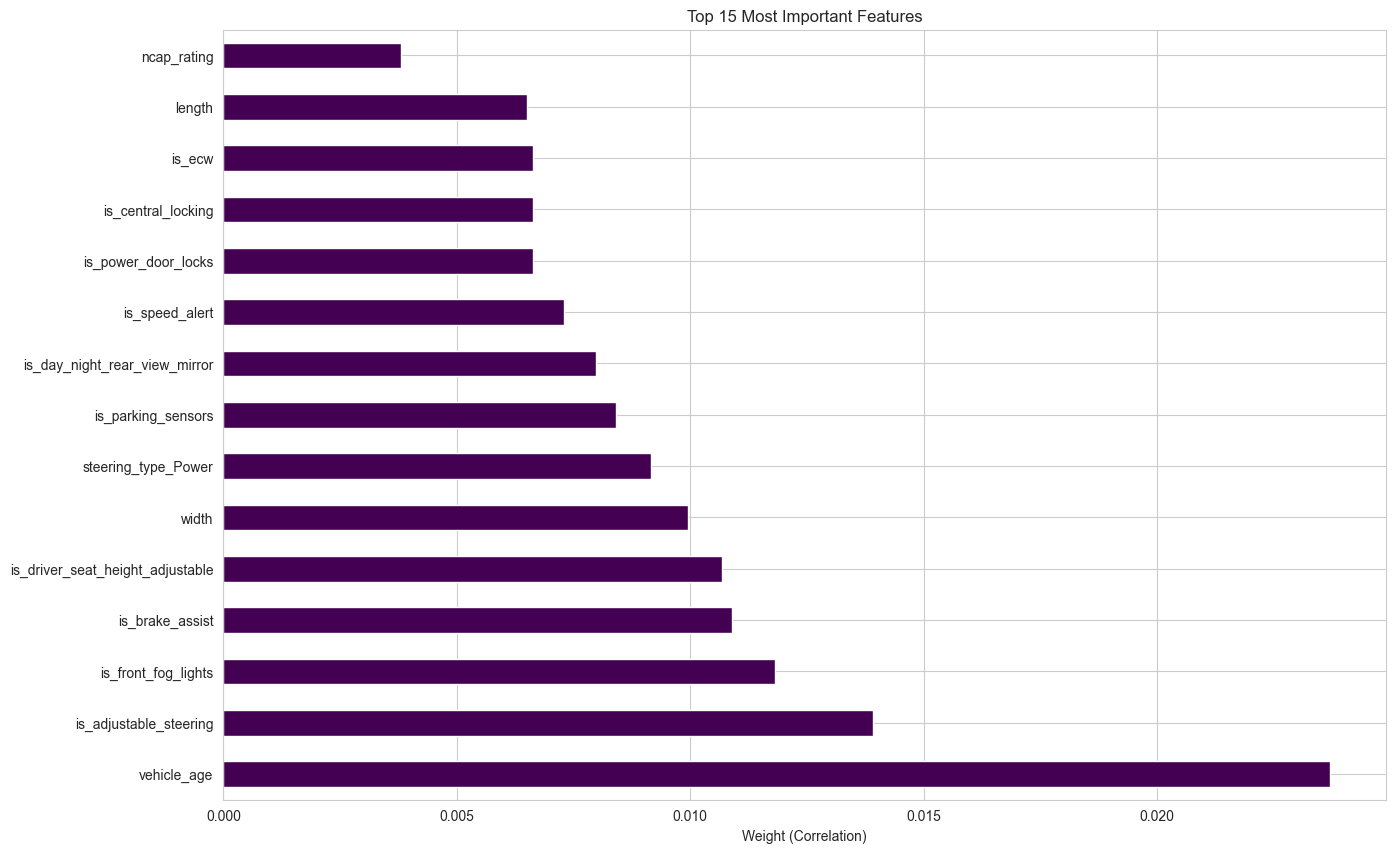

In [337]:
import matplotlib.pyplot as plt

# Extract correlation values from the weights dictionary
correlation_weights = weights.apply(lambda x: x['correlation'])

plt.figure(figsize=(15,10))
top_weights = correlation_weights.nlargest(15)
top_weights.plot(kind='barh', colormap='viridis')
plt.title('Top 15 Most Important Features')
plt.xlabel('Weight (Correlation)')
plt.show()
